In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('input2.csv')
data

,date,load,work,temp,dewp,pload
0,2015-07-01 08:00:00,1605.0,True,73.0,64.0,1471
1,2015-07-01 09:00:00,1537.0,True,74.0,64.0,1418
2,2015-07-01 10:00:00,1487.0,True,73.0,64.0,1376
3,2015-07-01 11:00:00,1470.0,True,73.0,66.0,1354
4,2015-07-01 12:00:00,1503.0,True,72.5,65.5,1346
5,2015-07-01 13:00:00,1511.0,True,75.0,64.0,1378
6,2015-07-01 14:00:00,1566.0,True,77.0,64.0,1454
7,2015-07-01 15:00:00,1612.0,True,82.0,63.0,1581
8,2015-07-01 16:00:00,1655.0,True,85.0,62.0,1734
9,2015-07-01 17:00:00,1805.0,True,90.0,60.0,1896


In [4]:
data2 = data.drop(['pload'], axis=1)
data2.date = pd.to_datetime(data2.date)
data2['doy'] = data2.date.map(lambda x: x.dayofyear)
data2['hour'] = data2.date.map(lambda x: x.hour)

In [5]:
test = data2.set_index('date')['2017'].reset_index()
training = data2.set_index('date')[:'2016'].reset_index()

In [6]:
features = ['temp', 'doy', 'hour']

In [7]:
trainingD = (training[features].values, training['load'].values)
testD = (test[features].values, test['load'].values)

In [8]:
(train_data, train_labels) = trainingD
(test_data, test_labels) = testD
# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [9]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [10]:
train_data

array([[ 0.832866  , -0.00630906,  1.51655951],
       [-1.09785857,  1.09577893,  0.50511965],
       [ 0.50102272,  0.29155256, -0.79530303],
       ...,
       [-0.73584771,  0.94684812, -0.2173374 ],
       [-1.58053971, -1.24739915,  0.36062824],
       [-0.73584771, -2.11119785, -1.08428585]])

In [11]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(256, activation=tf. nn.relu,
                           input_shape=(train_data.shape[1],)),
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mape'])
    return model

print(train_data.shape)
print(train_data[1].shape)
model = build_model()
model.summary()

(12637, 3)
(3,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 83,329
Trainable params: 83,329
Non-trainable params: 0
_________________________________________________________________


In [12]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=60)

EPOCHS = 100

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2)

Train on 10109 samples, validate on 2528 samples
Epoch 1/100
10109/10109 [==============================] - 2s 218us/step - loss: 716162.9384 - mean_absolute_percentage_error: 31.8206 - val_loss: 34130.3338 - val_mean_absolute_percentage_error: 8.3338
Epoch 2/100
10109/10109 [==============================] - 1s 77us/step - loss: 35962.5668 - mean_absolute_percentage_error: 8.3000 - val_loss: 28150.3668 - val_mean_absolute_percentage_error: 7.3875
Epoch 3/100
10109/10109 [==============================] - 1s 78us/step - loss: 32101.3873 - mean_absolute_percentage_error: 7.8028 - val_loss: 26893.2657 - val_mean_absolute_percentage_error: 7.3054
Epoch 4/100
10109/10109 [==============================] - 1s 78us/step - loss: 30962.3414 - mean_absolute_percentage_error: 7.6383 - val_loss: 25284.5775 - val_mean_absolute_percentage_error: 6.9279
Epoch 5/100
10109/10109 [==============================] - 1s 83us/step - loss: 30604.9744 - mean_absolute_percentage_error: 7.5370 - val_loss: 2528

10109/10109 [==============================] - 1s 77us/step - loss: 20882.2664 - mean_absolute_percentage_error: 6.3235 - val_loss: 16814.2727 - val_mean_absolute_percentage_error: 5.5444
Epoch 42/100
10109/10109 [==============================] - 1s 76us/step - loss: 20752.1172 - mean_absolute_percentage_error: 6.2882 - val_loss: 19535.2282 - val_mean_absolute_percentage_error: 6.4927
Epoch 43/100
10109/10109 [==============================] - 1s 71us/step - loss: 20691.7807 - mean_absolute_percentage_error: 6.2835 - val_loss: 16532.2840 - val_mean_absolute_percentage_error: 5.3597
Epoch 44/100
10109/10109 [==============================] - 1s 70us/step - loss: 20297.0909 - mean_absolute_percentage_error: 6.2220 - val_loss: 16640.0565 - val_mean_absolute_percentage_error: 5.3365
Epoch 45/100
10109/10109 [==============================] - 1s 72us/step - loss: 20636.1093 - mean_absolute_percentage_error: 6.2549 - val_loss: 16153.1571 - val_mean_absolute_percentage_error: 5.3037
Epoch 46

Epoch 82/100
10109/10109 [==============================] - 1s 71us/step - loss: 16802.2844 - mean_absolute_percentage_error: 5.5164 - val_loss: 13283.8705 - val_mean_absolute_percentage_error: 4.8551
Epoch 83/100
10109/10109 [==============================] - 1s 73us/step - loss: 17032.9535 - mean_absolute_percentage_error: 5.5679 - val_loss: 12450.1500 - val_mean_absolute_percentage_error: 4.4282
Epoch 84/100
10109/10109 [==============================] - 1s 73us/step - loss: 16397.6374 - mean_absolute_percentage_error: 5.4147 - val_loss: 12691.2678 - val_mean_absolute_percentage_error: 4.5117
Epoch 85/100
10109/10109 [==============================] - 1s 73us/step - loss: 16768.4265 - mean_absolute_percentage_error: 5.5195 - val_loss: 13535.2760 - val_mean_absolute_percentage_error: 4.7191
Epoch 86/100
10109/10109 [==============================] - 1s 74us/step - loss: 16865.3083 - mean_absolute_percentage_error: 5.5073 - val_loss: 12555.6160 - val_mean_absolute_percentage_error: 4.

In [ ]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_percentage_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_percentage_error']),
           label = 'Val loss')
    plt.legend()

plot_history(history)

In [154]:
[loss,mpe] = model.evaluate(test_data, test_labels, verbose=0)


print("Testing set Mean Abs percent Error: {:7.2f}".format(mpe))

Testing set Mean Abs percent Error:    4.50


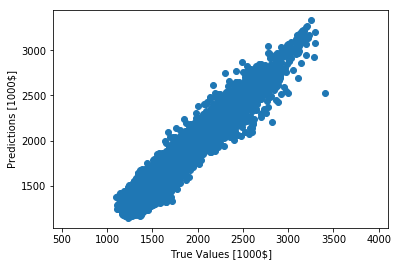

In [128]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

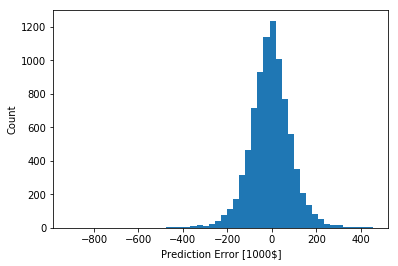

In [79]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")